In [1]:
import os
import ast
import shutil
import pandas as pd

In [2]:
filename = "FL_Restaurants_Photos" + ".csv"
path = "C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/" + filename

merged_photos_df = pd.read_csv(path)
merged_photos_df.shape

(30410, 17)

In [3]:
label_list = merged_photos_df['label'].unique().tolist()
print(label_list)

['outside', 'food', 'inside', 'menu', 'drink']


In [4]:
def upscale_attribute(attributes_str):
    try:
        attributes = ast.literal_eval(attributes_str)

        if 'Ambience' in attributes and attributes['Ambience']:
            ambience = ast.literal_eval(attributes['Ambience'])
            
            if isinstance(ambience, dict):
                upscale = ambience.get('upscale') is True
                classy = ambience.get('classy') is True
                return upscale and classy
    except (ValueError, SyntaxError, TypeError):
        pass
    return 


def fastfood_attribute(attributes_str):
    if pd.isna(attributes_str):
        return False
    try:
        attributes = ast.literal_eval(attributes_str)
        
        if attributes.get('RestaurantsTableService') == 'False' and attributes.get('DriveThru') == 'True':
            return True
    except (ValueError, SyntaxError, TypeError):
        pass
    return False 


def delivery_attribute(attributes_str):
    if pd.isna(attributes_str):
        return False
    try:
        attributes = ast.literal_eval(attributes_str)
        
        if attributes.get('RestaurantsTableService') == 'False' and attributes.get('RestaurantsDelivery') == 'True':
            return True
    except (ValueError, SyntaxError, TypeError):
        pass
    return False 


def no_table_service(attributes_str):
    if pd.isna(attributes_str):
        return False
    try:
        attributes = ast.literal_eval(attributes_str)
        
        if attributes.get('RestaurantsTableService') == 'False':
            return True
    except (ValueError, SyntaxError, TypeError):
        pass
    return False

In [5]:
functions_list = ['upscale_attribute', 'fastfood_attribute', 'delivery_attribute', 'no_table_service']

In [6]:
function_mapping = {
    'upscale_attribute': upscale_attribute,
    'fastfood_attribute': fastfood_attribute,
    'delivery_attribute': delivery_attribute,
    'no_table_service': no_table_service
}

In [7]:
results_dict = {}

for label in label_list:
    
    df_labels = merged_photos_df[merged_photos_df['label'] == label]
    
    for function_name in functions_list:
        function = function_mapping[function_name]
        df_labels[f"{function_name}_result"] = df_labels['attributes'].apply(function)
            
        df_filtered = df_labels[df_labels[f"{function_name}_result"] == True].copy()

        if not df_filtered.empty:
            key = f"{label}_{function_name}"
            results_dict[key] = df_filtered          

C:\Users\tokud\AppData\Local\Temp/ipykernel_19868/2145337974.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labels[f"{function_name}_result"] = df_labels['attributes'].apply(function)


In [8]:
for key, df in results_dict.items():
    print(f"{key}: {df.shape}")

outside_upscale_attribute: (74, 18)
outside_fastfood_attribute: (32, 19)
outside_delivery_attribute: (276, 20)
outside_no_table_service: (512, 21)
food_upscale_attribute: (536, 18)
food_fastfood_attribute: (434, 19)
food_delivery_attribute: (2364, 20)
food_no_table_service: (2986, 21)
inside_upscale_attribute: (320, 18)
inside_fastfood_attribute: (75, 19)
inside_delivery_attribute: (714, 20)
inside_no_table_service: (1161, 21)
menu_upscale_attribute: (3, 18)
menu_fastfood_attribute: (2, 19)
menu_delivery_attribute: (48, 20)
menu_no_table_service: (70, 21)
drink_upscale_attribute: (82, 18)
drink_fastfood_attribute: (32, 19)
drink_delivery_attribute: (168, 20)
drink_no_table_service: (282, 21)


In [9]:
upscale_list = ['outside_upscale_attribute', 'food_upscale_attribute', 'inside_upscale_attribute', 'menu_upscale_attribute', 'drink_upscale_attribute']

upscale_dataframes = []

for i in upscale_list:
    if i in results_dict:
        df_upscale = results_dict[i]
        upscale_dataframes.append(df_upscale)
        
df_upscale_photos = pd.concat(upscale_dataframes, ignore_index=True)
df_upscale_photos.shape

(1015, 18)

In [10]:
df_upscale_photos['stars'].value_counts()

4.0    482
4.5    314
3.5    186
3.0     33
Name: stars, dtype: int64

In [11]:
df_upscale_photos = df_upscale_photos[df_upscale_photos['stars'].isin([4, 4.5])]
df_upscale_photos.shape

(796, 18)

In [13]:
df_upscale_photos['label'] = "fine dining"
df_upscale_photos[['photo_id', 'label']].head()

,photo_id,label
9,7sVrf-VF50HGES_h8OQ46A,fine dining
10,1Zh80DfJ5okYm2S8wxePUA,fine dining
11,jBEueCghl2S_bFDuVux1lA,fine dining
12,NO3puIMIwXjNbstSXXXh0A,fine dining
13,K5wG2QbekQxLd8VmE0Hu2A,fine dining


In [40]:
photos_dir = "C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/Florida Photos/"
output_dir = "C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Photos/Upscale Images/"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

photo_ids = set(df_upscale_photos['photo_id'].tolist())  


for image_file in os.listdir(photos_dir):
    if image_file.endswith('.jpg'):

        photo_id = os.path.splitext(image_file)[0]
        
        if photo_id in photo_ids:
            src_path = os.path.join(photos_dir, image_file)
            dest_path = os.path.join(output_dir, image_file)
            
            shutil.copy(src_path, dest_path)

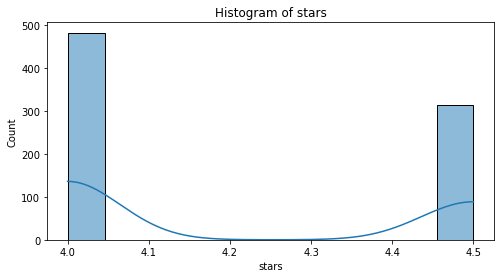

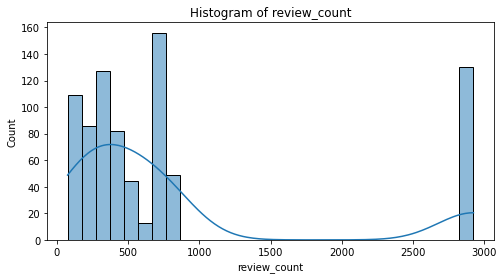

In [14]:
numeric_columns = df_upscale_photos[['stars', 'review_count']]

import seaborn as sns
import matplotlib.pyplot as plt

for c in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_upscale_photos[c], kde=True)
    plt.title(f'Histogram of {c}')
    plt.show()

In [15]:
fastfood_list = [
'outside_fastfood_attribute',
'outside_delivery_attribute',
'outside_no_table_service',
'food_fastfood_attribute',
'food_delivery_attribute',
'food_no_table_service',
'inside_fastfood_attribute',
'inside_delivery_attribute',
'inside_no_table_service',
'menu_fastfood_attribute',
'menu_delivery_attribute',
'menu_no_table_service',
'drink_fastfood_attribute',
'drink_delivery_attribute',
'drink_no_table_service']

fastfood_dataframes = []

for i in fastfood_list:
    if i in results_dict:
        df_fastfood = results_dict[i]
        fastfood_dataframes.append(df_fastfood)
        
df_fastfood_photos = pd.concat(fastfood_dataframes, ignore_index=True)
df_fastfood_photos.shape

(9156, 21)

In [16]:
df_fastfood_photos['stars'].value_counts()

4.5    3545
4.0    2374
3.5    1186
3.0     704
5.0     513
2.5     483
2.0     269
1.5      82
Name: stars, dtype: int64

In [17]:
df_fastfood_photos['label'] = "fast food"
df_fastfood_photos[['photo_id', 'label']].head()

,photo_id,label
0,_x_Bd5TuGN2fN_aO_7aLEw,fast food
1,ZNwNBhlCICFwHIQz8DSa3A,fast food
2,dE1wy34zQnelHg6ONgRQww,fast food
3,n6pTHg6JLgnJYHuLKwhLfw,fast food
4,UFi0lSnl8ebMtV29e3CcLg,fast food


In [18]:
lower_rated = df_fastfood_photos[df_fastfood_photos['stars'].isin([1.5, 2.0, 2.5])]
lower_rated.shape

(834, 21)

In [19]:
middle_rated = df_fastfood_photos[df_fastfood_photos['stars'].isin([3.0, 3.5])]
middle_rated.shape

(1890, 21)

In [20]:
highly_rated = df_fastfood_photos[df_fastfood_photos['stars'].isin([4.0, 4.5, 5.0])]
highly_rated.shape

(6432, 21)

In [56]:
photos_dir = "C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/Florida Photos/"
output_dir = "C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Photos/Fastfood Images/Lower Rated/"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

photo_ids = set(lower_rated['photo_id'].tolist())  


for image_file in os.listdir(photos_dir):
    if image_file.endswith('.jpg'):

        photo_id = os.path.splitext(image_file)[0]
        
        if photo_id in photo_ids:
            src_path = os.path.join(photos_dir, image_file)
            dest_path = os.path.join(output_dir, image_file)
            
            shutil.copy(src_path, dest_path)

In [23]:
df_list = ['lower_rated', 'middle_rated', 'highly_rated']

df_mapping = {
    'lower_rated': lower_rated,
    'middle_rated': middle_rated,
    'highly_rated': highly_rated
}

for i in df_list:
    i = df_mapping[i]
    duplicates_count = i['photo_id'].duplicated().sum()
    print(f"Number of duplicate values in 'photo_id_column': {duplicates_count}")

Number of duplicate values in 'photo_id_column': 501
Number of duplicate values in 'photo_id_column': 972
Number of duplicate values in 'photo_id_column': 2672


In [60]:
photos_dir = "C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/Florida Photos/"
output_dir = "C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Photos/Fastfood Images/Medium Rated/"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

photo_ids = set(middle_rated['photo_id'].tolist())  


for image_file in os.listdir(photos_dir):
    if image_file.endswith('.jpg'):

        photo_id = os.path.splitext(image_file)[0]
        
        if photo_id in photo_ids:
            src_path = os.path.join(photos_dir, image_file)
            dest_path = os.path.join(output_dir, image_file)
            
            shutil.copy(src_path, dest_path)

In [61]:
photos_dir = "C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/Florida Photos/"
output_dir = "C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Photos/Fastfood Images/Highly Rated/"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

photo_ids = set(highly_rated['photo_id'].tolist())  


for image_file in os.listdir(photos_dir):
    if image_file.endswith('.jpg'):

        photo_id = os.path.splitext(image_file)[0]
        
        if photo_id in photo_ids:
            src_path = os.path.join(photos_dir, image_file)
            dest_path = os.path.join(output_dir, image_file)
            
            shutil.copy(src_path, dest_path)

In [27]:
df_lists = ['lower_rated', 'middle_rated', 'highly_rated', 'df_upscale_photos']

df_mapping = {
    'lower_rated': lower_rated,
    'middle_rated': middle_rated,
    'highly_rated': highly_rated,
    'df_upscale_photos': df_upscale_photos
}

image_df_directory = "C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/Image Datasets/"


for df in df_lists:
    df_sub = df_mapping[df]
    df_sub = df_sub.drop_duplicates(subset='photo_id')
    
    filename = df + ".csv"
    outpath = image_df_directory + filename
    df_sub.to_csv(outpath, index=False)
    print(filename)
    print(df_sub.shape)

lower_rated.csv
(333, 21)
middle_rated.csv
(918, 21)
highly_rated.csv
(3760, 21)
df_upscale_photos.csv
(796, 18)
